In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
df = pd.read_csv("BTC-USD.csv")
df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0


In [3]:
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2637,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,3.770731e+10
2638,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,3.367681e+10
2639,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,2.847970e+10
2640,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,2.960358e+10


In [4]:
df.shape

(2638, 7)

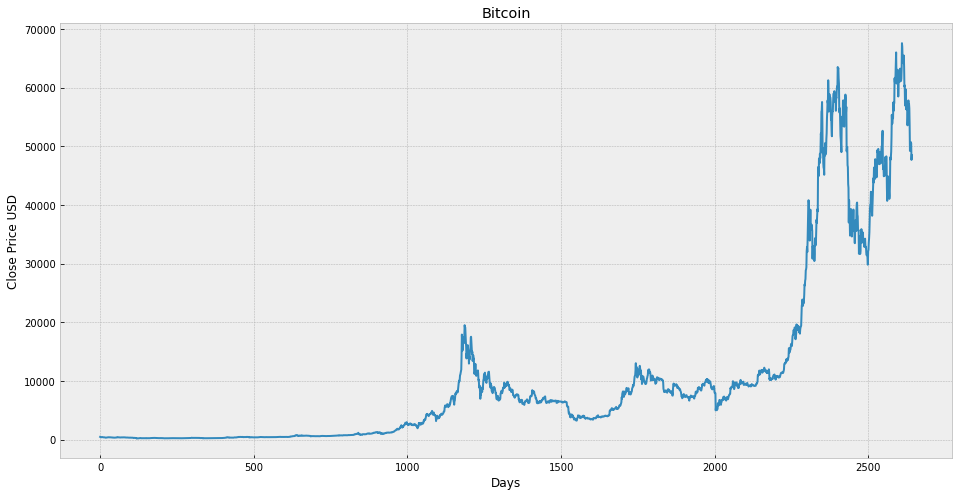

In [5]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])

In [6]:
df = df[['Close']]
df.head(4)

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992


In [7]:
future_days = 90
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

<ipython-input-7-7cab5a4c44e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


,Close,Prediction
2638,50700.085938,NaN
2639,50504.796875,NaN
2640,47672.121094,NaN
2641,48460.320313,NaN


In [8]:
X = np.array(df.drop(['Prediction'], 1 ))[:-future_days]
print(X)

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [46391.421875]
 [44883.910156]
 [45201.457031]]


In [9]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  327.062012   319.776001   311.395996 ... 50504.796875 47672.121094
 48460.320313]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [11]:
regr = RandomForestRegressor().fit(x_train, y_train)
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train,y_train)

In [12]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[40218.476563],
       [40406.269531],
       [38347.0625  ],
       [38053.503906],
       [35787.246094],
       [35615.871094],
       [35698.296875],
       [31676.693359],
       [32505.660156],
       [33723.027344],
       [34662.4375  ],
       [31637.779297],
       [32186.277344],
       [34649.644531],
       [34434.335938],
       [35867.777344],
       [35040.835938],
       [33572.117188],
       [33897.046875],
       [34668.546875],
       [35287.78125 ],
       [33746.003906],
       [34235.195313],
       [33855.328125],
       [32877.371094],
       [33798.011719],
       [33520.519531],
       [34240.1875  ],
       [33155.847656],
       [32702.025391],
       [32822.347656],
       [31780.730469],
       [31421.539063],
       [31533.068359],
       [31796.810547],
       [30817.832031],
       [29807.347656],
       [32110.693359],
       [32313.105469],
       [33581.550781],
       [34292.445313],
       [35350.1875  ],
       [37337.535156],
       [394

In [13]:
regr_prediction = regr.predict(x_future)
print(regr_prediction)
print("-----------------------------------------")
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print("-----------------------------------------")
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[50291.04007792 53827.03660135 57023.18347664 51660.58417956
 51122.97660168 48290.20367179 47951.65253891 48762.27656248
 47283.65468735 43788.30328106 44684.08585964 47635.7181639
 50542.1267971  43235.11328135 47329.58828158 52011.10949229
 44029.32730488 48051.40871076 50029.80050767 46319.36195312
 52675.53347661 43604.11050762 55933.82460916 51450.03136716
 55568.8159768  51783.17699216 53900.56265605 55933.82460916
 55172.22136719 56514.72921881 56215.07867207 54152.95621078
 57745.93191444 57256.96132828 54152.95621078 59701.41960985
 58092.45507842 58682.57882854 60283.28019574 57754.93874994
 59428.25082026 57388.01625028 47008.20867179 54639.02703138
 59243.59207041 59044.33613289 59572.940508   60239.2937111
 60353.25128898 50797.16468778 54005.33050776 61465.05742199
 59321.84996093 60010.88816426 63130.46796899 53214.04468743
 54608.13386706 60489.184922   60489.184922   63130.46796899
 60015.29734416 52790.06917947 60855.7027735  58423.03851593
 60772.13496118 56735.8999

<ipython-input-14-d49fc9593a29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


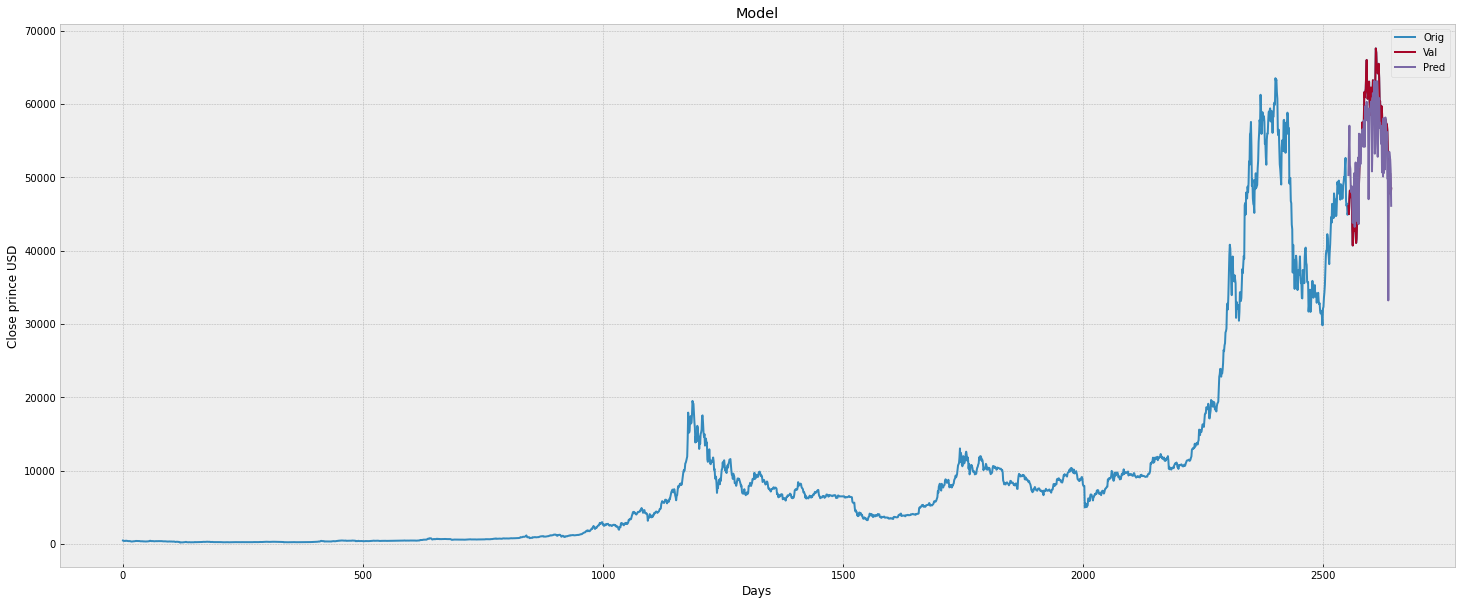

In [14]:
predictions = regr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(25,10))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close prince USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [15]:
print(valid)

             Close  Prediction   Predictions
2552  46063.269531         NaN  50291.040078
2553  44963.074219         NaN  53827.036601
2554  47092.492188         NaN  57023.183477
2555  48176.347656         NaN  51660.584180
2556  47783.359375         NaN  51122.976602
...            ...         ...           ...
2637  50582.625000         NaN  53471.770898
2638  50700.085938         NaN  52811.672032
2639  50504.796875         NaN  52435.885117
2640  47672.121094         NaN  50913.651055
2641  48460.320313         NaN  46100.715117

[90 rows x 3 columns]


In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(valid.Close, valid.Predictions)

0.5144569302295465

In [17]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#Create new df with only close column
data = valid.filter(['Close'])
#Convert df to numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#Create new df with only close column
dataR = valid.filter(['Predictions'])
#Convert df to numpy array
datasetR = dataR.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataR = scaler.fit_transform(datasetR)

In [18]:
from math import sqrt

rms = sqrt(mean_squared_error(scaled_data, scaled_dataR))

print(rms)

0.2341179055236573


In [19]:
mean_absolute_error(scaled_data, scaled_dataR)

0.19050947890204298

<ipython-input-20-4712ff35181a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


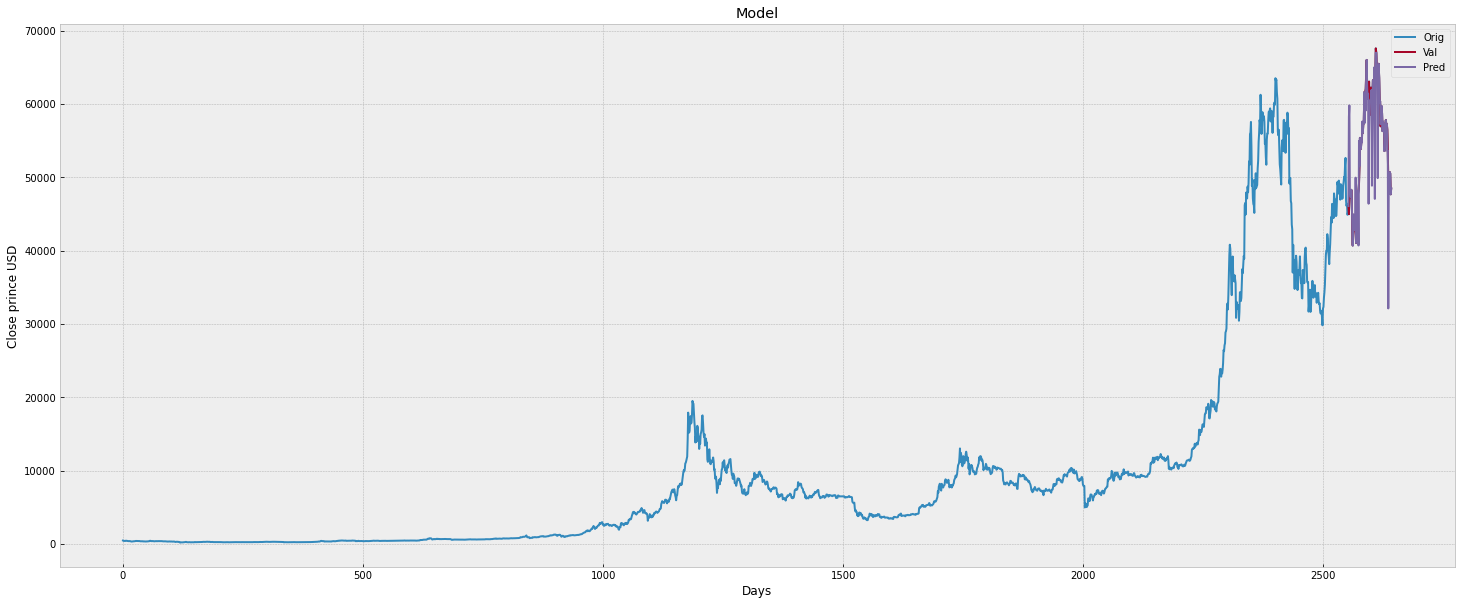

In [20]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(25,10))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close prince USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [21]:
print(valid)

             Close  Prediction   Predictions
2552  46063.269531         NaN  46063.269531
2553  44963.074219         NaN  58245.003906
2554  47092.492188         NaN  59793.234375
2555  48176.347656         NaN  48176.347656
2556  47783.359375         NaN  47783.359375
...            ...         ...           ...
2637  50582.625000         NaN  50582.625000
2638  50700.085938         NaN  50700.085938
2639  50504.796875         NaN  50504.796875
2640  47672.121094         NaN  47672.121094
2641  48460.320313         NaN  48460.320313

[90 rows x 3 columns]


In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(valid.Close, valid.Predictions)

0.6497418143667979

In [23]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#Create new df with only close column
data = valid.filter(['Close'])
#Convert df to numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#Create new df with only close column
dataR = valid.filter(['Predictions'])
#Convert df to numpy array
datasetR = dataR.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataR = scaler.fit_transform(datasetR)

In [24]:
from math import sqrt

rms = sqrt(mean_squared_error(scaled_data, scaled_dataR))

print(rms)

0.1829701099123248


In [25]:
mean_absolute_error(scaled_data, scaled_dataR)

0.14666226558138884

In [26]:
from sklearn.metrics import accuracy_score

<ipython-input-27-4670fea6a214>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


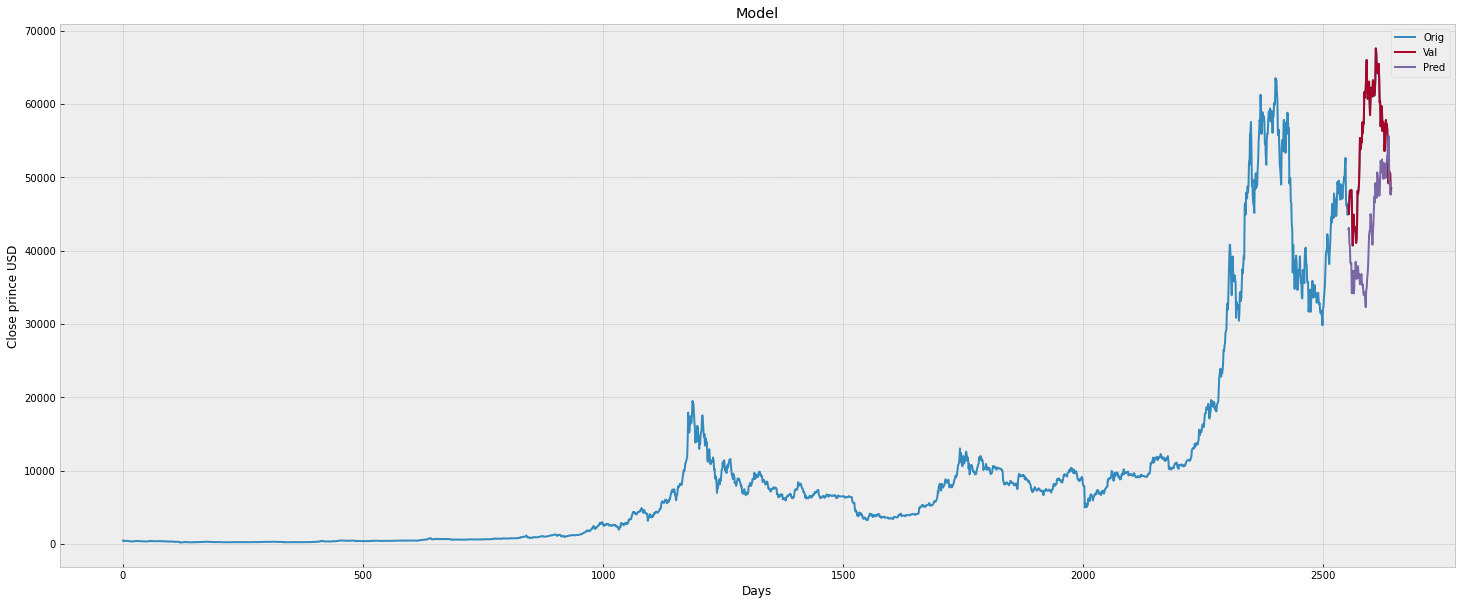

In [27]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(25,10))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close prince USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [28]:
print(valid)

             Close  Prediction   Predictions
2552  46063.269531         NaN  42913.810244
2553  44963.074219         NaN  43105.612933
2554  47092.492188         NaN  41002.438090
2555  48176.347656         NaN  40702.611486
2556  47783.359375         NaN  38387.964952
...            ...         ...           ...
2637  50582.625000         NaN  49647.227694
2638  50700.085938         NaN  48912.121693
2639  50504.796875         NaN  49218.559155
2640  47672.121094         NaN  47678.859322
2641  48460.320313         NaN  48003.186399

[90 rows x 3 columns]


In [29]:

print(r2_score(valid.Close, valid.Predictions))

-3.1948274255478717


In [30]:
#Create new df with only close column
dataR = valid.filter(['Predictions'])
#Convert df to numpy array
datasetR = dataR.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataR = scaler.fit_transform(datasetR)

scaled_dataR

array([[0.45610459],
       [0.46433167],
       [0.37411919],
       [0.36125859],
       [0.26197535],
       [0.25446752],
       [0.25807854],
       [0.08189478],
       [0.11821127],
       [0.17154331],
       [0.21269824],
       [0.08018999],
       [0.10421932],
       [0.21213779],
       [0.20270526],
       [0.26550337],
       [0.22927562],
       [0.16493203],
       [0.17916699],
       [0.21296588],
       [0.24009413],
       [0.17254989],
       [0.19398104],
       [0.17733932],
       [0.13449567],
       [0.17482832],
       [0.16267158],
       [0.19419975],
       [0.14669554],
       [0.12681389],
       [0.13208513],
       [0.08645258],
       [0.07071665],
       [0.07560267],
       [0.08715704],
       [0.04426864],
       [0.        ],
       [0.10090803],
       [0.10977557],
       [0.16534531],
       [0.19648913],
       [0.2428281 ],
       [0.32989248],
       [0.42055178],
       [0.44635393],
       [0.44690224],
       [0.54447109],
       [0.517

In [31]:
rms = sqrt(mean_squared_error(scaled_data, scaled_dataR))

print(rms)

0.34608824826456874


In [32]:

print(r2_score(scaled_data, scaled_dataR))

-0.6221135656441672


In [33]:
mean_absolute_error(scaled_data, scaled_dataR)

0.2847588446721667

In [34]:
from sklearn.metrics import accuracy_score